# Algoritmo BFS
## Crear grafo

In [87]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import math

In [88]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [3]:
def conversor(x, y, n): ##Ingresar coordenada X, Y y el numero de nodos en cada lado (ejemplo el nodo que nos piden es de 1000x1000 es decir ingresa 1000 como 'n')
  r = x*n + y
  return r

In [57]:
GR, _ = readAdjl("Archivos/grafo-complejidad.txt", weighted=True) ##Cuando quiera leer de otro archivo .txt cambia el nombre de "1.txt" x el de tu archivo
##for i, edges in enumerate(G):
  ##print(f"{i:2}: {edges}")
##adjlShow(G, weighted=True)

In [58]:
import csv

In [ ]:
almacenes = [] ##Arreglo de almacenes [Nombre del almacen, Nodo en el q se encuentra]
with open("Archivos/almacenes.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Almacenes':
        row[1] = conversor(int(row[1]),int(row[2]), 1000) 
        row.pop(2)
        almacenes.append(row)  
    print(almacenes)

In [ ]:
puntosEntrega = [] ##Arreglo de puntos de entrega [Nombre del punto, Nodo en el q se encuentra]
with open("Archivos/puntos_entrega.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Puntos de Entrega':
        row[1] = conversor(int(row[1]),int(row[2]), 1000) 
        row.pop(2)
        puntosEntrega.append(row)  
    print(puntosEntrega)

#BFS

In [115]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        parent[v] = u
        queue.append(v)

  return parent

Algoritmo BFS punto a punto

In [116]:
def bfsPointToPoint(G, s, t):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True

  while queue and visited[t] == False:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        parent[v] = u
        queue.append(v)

  return parent, parent[t]

In [118]:
def showInfoBFS(G, source, target):
  path,_ = bfsPointToPoint(G, source, target)
  t = target
  targetPath = []
  targetPath.append(target)
  targetPath.append(path[t])
  while path[t] != source:
    t = path[t]
    targetPath.append(path[t])

  truePath = path
  for i in range(len(truePath)):
    if i not in targetPath and i != target:
      truePath[i] = None 

  return targetPath, truePath, len(targetPath)-1

#Prueba con grafo de 100 nodos

In [119]:
def crearGrafoVersion1(n):
  t = [[] for i in range(n**2)]
  for i in range(n**2):
    if i == 0:
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i in range(1,n-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i == n-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
    elif i%n == 0 and i != 0 and i != n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif (i+1)%n == 0 and i != n-1 and i != (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif i == n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i in range(n*(n-1)+1,(n**2)-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i == (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i-n])
    else:
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])

  return t

In [120]:
t = crearGrafoVersion1(10)

In [121]:
fichero = open("1.txt", 'w')
for i in range(len(t)):
    for j in range(len(t[i])):
      fichero.write(str(t[i][j][1]) + '|1' + " ")
    fichero.write('\n')
fichero.close()

In [ ]:
G, _ = readAdjl("1.txt", weighted=True) ##Cuando quiera leer de otro archivo .txt cambia el nombre de "1.txt" x el de tu archivo
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

In [123]:
def quitarPeso(G):
  L = []
  PL = []
  for i, edges in enumerate(G):
    for j in edges:
      PL.append(j[0])
    L.append(PL)
    PL = []
  return L

In [124]:
GC = quitarPeso(G)

In [125]:
bfsPath = bfs(GC,0)
print(bfsPath)

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


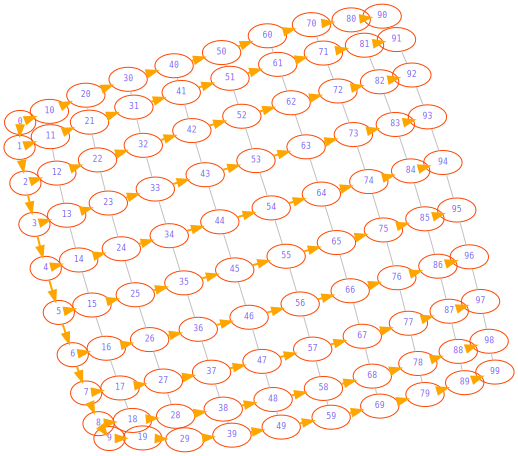

In [126]:
adjlShow(GC, path=bfsPath)

[95, 85, 75, 65, 55, 45, 35, 36, 37, 38, 39]
10


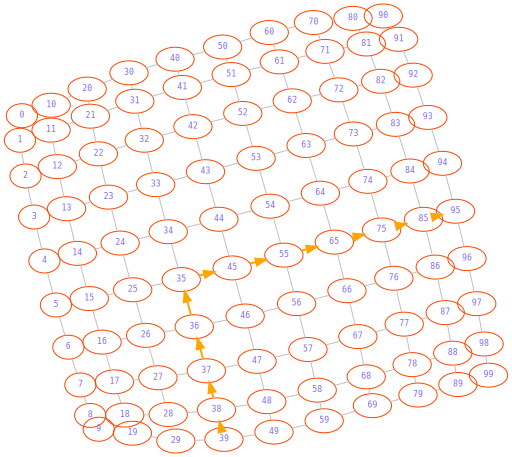

In [127]:
path, tPath, aristas = showInfoBFS(GC, 39, 95)
print(path)
print(aristas)
adjlShow(GC,path=tPath)

#Con el grafo trabajado

In [128]:
def BFSPointToPointEdges(G, source, target):
  path,_ = bfsPointToPoint(G, source, target)
  t = target
  targetPath = []
  targetPath.append(target)
  targetPath.append(path[t])
  while path[t] != source:
    t = path[t]
    targetPath.append(path[t])
  return len(targetPath)-1

In [ ]:
almacenes2 = [] ##Arreglo de almacenes [Nombre del almacen, posicion X, posicion Y]
with open("Archivos/almacenes.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Almacenes':
        almacenes2.append(row)  
    print(almacenes2)

In [ ]:
puntosEntrega2 = [] ##Arreglo de puntos de entrega [Nombre del punto, posicion X, posicion Y]
with open("Archivos/puntos_entrega.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Puntos de Entrega':
        puntosEntrega2.append(row)  
    print(puntosEntrega2)

In [131]:
def dist(a,b):
  _, x1, y1 = a
  _, x2, y2 = b
  return abs(int(x1) - int(x2)) + abs(int(y1) - int(y2))

In [132]:
group = [-1] * len(puntosEntrega2)

for i in range(len(puntosEntrega2)):
  m = 0
  d = dist(puntosEntrega2[i], puntosEntrega2[len(puntosEntrega2)-1])
  for j in range(len(almacenes2)):
    d2 = dist(puntosEntrega2[i], almacenes2[j])
    if d2 < d:
      d = d2
      m = j
  group[i] = m

In [133]:
group = np.array(group)

cant = []
for i in range(len(almacenes)):
  cant.append(len(group[group == i]))

print(min(cant))
print(max(cant))
print(np.mean(cant))

2
185
60.0


In [134]:
GRC = quitarPeso(GR)

GRUPOS

In [143]:
#GRUPO 11
group[group == 11]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 11: 
    camino = BFSPointToPointEdges(GRC, almacenes[11][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[163, 42, 62, 82, 48, 70, 55, 35, 116, 121, 78, 49, 144, 63, 82, 84, 70, 53, 38, 111, 81, 118, 78, 50, 17, 78, 71, 92, 51, 86, 101, 68, 106, 27, 159, 76, 62, 90, 54, 43, 30, 116, 100, 50, 111, 34, 74, 33, 25, 137, 82, 92, 131, 55, 30, 125, 89, 26, 87, 158, 50, 119, 144, 33, 65, 77, 66, 49, 145, 43, 84, 103, 97, 65]


In [144]:
#GRUPO 12
group[group == 12]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 12: 
    camino = BFSPointToPointEdges(GRC, almacenes[12][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[32, 49, 37, 129, 109, 120, 74, 64, 42, 51, 47, 60, 48, 47, 88, 38, 52, 7, 36, 122, 5, 139, 85, 44, 64, 53, 58, 26, 99, 77, 109, 76, 75, 71, 19, 69, 19, 36, 151, 98, 139, 139, 75, 56, 150, 78]


In [145]:
#GRUPO 13
group[group == 13]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 13: 
    camino = BFSPointToPointEdges(GRC, almacenes[13][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[31, 108, 55, 137, 127, 90, 94, 60, 9, 72, 32, 104, 46, 103, 25, 126, 70, 114, 63, 38, 64, 22, 138, 46, 47, 78, 73, 141, 113, 40, 90, 90, 64, 64, 33, 34, 80, 40, 78, 30, 70, 8, 70, 108, 55, 29, 59, 67, 85, 150, 61, 39, 90, 85, 39, 59, 122, 79]


In [146]:
#GRUPO 14
group[group == 14]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 14: 
    camino = BFSPointToPointEdges(GRC, almacenes[14][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[138, 123, 98, 129, 128, 182, 57, 26, 162, 114, 156, 100, 149, 48, 124, 51, 61, 150, 62, 36, 39, 110, 69, 66, 73, 64, 21, 109, 96, 39, 146, 83, 116, 117, 15, 38, 48, 137, 70, 173, 172, 109, 120, 70, 116, 42, 119, 77, 84, 81, 169, 62, 50, 47, 149, 136, 158, 37, 122, 125, 24, 93, 80, 119, 99, 78, 62, 50, 149, 134, 100, 52, 90, 160, 170, 166, 104, 125, 101, 155, 95, 88, 42, 102, 165, 130, 125, 60, 146, 112, 101, 86, 131, 58, 62, 148, 108, 87, 98]


In [147]:
#GRUPO 15
group[group == 15]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 15: 
    camino = BFSPointToPointEdges(GRC, almacenes[15][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[220, 32, 13, 103, 161, 63, 111, 53, 94, 105, 196, 182, 108, 53, 74, 216, 112, 60, 27, 84, 196, 82, 208, 190, 149, 104, 148, 50, 314, 124, 86, 127, 223, 51, 94, 75, 62, 160, 207, 149, 184, 89, 118, 111, 323, 141, 264, 57, 153, 150, 187, 160, 238, 188, 241, 200, 241, 94, 69, 180, 65, 83, 200, 172, 43, 99, 234, 90, 204, 57, 220, 59, 144, 145, 109, 228, 182, 89, 148, 21, 99, 89, 314, 256, 211, 79, 263, 208, 216, 246, 54, 71, 223, 69, 129, 222, 187, 154, 182, 300, 123, 261, 155, 171, 133, 171, 67, 75, 105, 117, 221, 86, 68, 97, 136, 194, 172, 92, 109, 126, 89, 282, 43, 142, 250, 13, 104, 134, 262, 175, 178, 249, 51, 209, 83, 176, 193, 101, 31, 204, 122, 50, 189, 116, 214, 123, 235, 40, 121, 211, 99, 226, 73, 164, 107, 134, 156, 116, 244]


In [148]:
#GRUPO 16
group[group == 16]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 16: 
    camino = BFSPointToPointEdges(GRC, almacenes[16][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[161, 140, 76, 76, 123, 57, 30, 153, 154, 113, 154, 168, 63, 41, 33, 139, 45, 110, 84, 17, 7, 51, 148, 64, 110, 63, 20, 61, 165, 167, 61, 61, 68, 64, 82, 88, 70, 56, 67, 132, 35, 120, 150, 166, 112]


In [149]:
#GRUPO 17
group[group == 17]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 17: 
    camino = BFSPointToPointEdges(GRC, almacenes[17][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[33, 60, 56, 49, 47, 15, 46, 15, 73, 25, 3, 50, 57, 49]


In [150]:
#GRUPO 18
group[group == 18]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 18: 
    camino = BFSPointToPointEdges(GRC, almacenes[18][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[103, 85, 94, 153, 49, 113, 125, 58, 46, 106, 123, 168, 118, 128, 77, 70, 117, 85, 140, 88, 186, 32, 129, 136, 128, 140, 118, 131, 141, 106, 148, 98, 141, 149, 121, 99, 104, 54, 40, 42, 45, 54, 56, 54, 134, 70, 84, 132, 69, 46, 90, 92, 28, 82, 84, 136, 57, 104, 94, 112, 152, 105, 171, 75, 32, 65, 154, 136, 41, 86, 65, 150, 38, 125, 49, 84, 140, 136, 163, 43, 78, 83, 129, 53, 80, 86, 85, 123, 31, 58, 35, 16, 52, 89, 43, 165, 44, 93, 78, 85, 68, 48, 71, 109, 143, 119, 170, 132]


In [151]:
#GRUPO 19
group[group == 19]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 19: 
    camino = BFSPointToPointEdges(GRC, almacenes[19][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[70, 63, 21, 14, 15, 34, 12, 87, 21, 35, 9, 13, 21, 30, 45, 20]


In [152]:
#GRUPO 20
group[group == 20]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 20: 
    camino = BFSPointToPointEdges(GRC, almacenes[20][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[175, 37, 147, 40, 124, 91, 41, 69, 91, 152, 77, 111, 60, 104, 67, 67, 39, 111, 60, 10, 173, 89, 143, 139, 89, 63, 94, 173, 152, 118, 155, 118, 165, 91, 29, 76, 89, 102, 102, 162, 45, 106, 76, 68, 23, 17, 172, 167, 121, 157, 154, 138, 116, 95, 115, 82, 85, 95, 119, 61, 66, 143, 111, 117, 167, 130, 28, 116, 138, 85, 86, 172, 151, 4, 125, 34, 8, 126, 155, 76, 118, 67]
